In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import re
import nltk

In [175]:
data = pd.read_csv('train.csv')

In [176]:
data['length']=data['text'].str.len()
data.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


Distribuciónde longitud según target

In [177]:
data_grouped = data.groupby('target')
data_fake = data_grouped.get_group(0)
data_real = data_grouped.get_group(1)

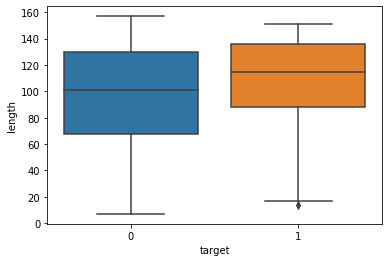

In [178]:
ax = sns.boxplot(x="target", y="length", data=data)

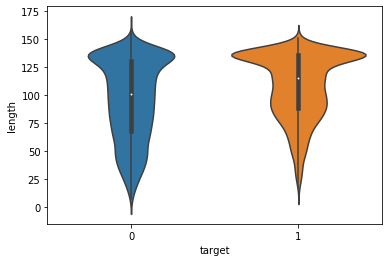

In [179]:
ax = sns.violinplot(x="target", y="length", data=data)

**Keyword**

In [180]:
data['keyword'] = data['keyword'].str.replace('%20', ' ')

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
 5   length    7613 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 357.0+ KB


In [182]:
grouped_by_keyword = data.groupby('keyword').agg({'target':'mean','length':'mean','text':'count'}).reset_index()
grouped_by_keyword.columns=['keyword','target_mean','length_mean','count']
grouped_by_keyword

,keyword,target_mean,length_mean,count
0,ablaze,0.361111,94.694444,36
1,accident,0.685714,100.085714,35
2,aftershock,0.000000,101.205882,34
3,airplane accident,0.857143,106.400000,35
4,ambulance,0.526316,98.394737,38
...,...,...,...,...
216,wounded,0.702703,111.054054,37
217,wounds,0.303030,103.363636,33
218,wreck,0.189189,88.540541,37
219,wreckage,1.000000,122.256410,39


In [183]:
#Ordenado por % de reales
ordered_by_target_mean = grouped_by_keyword.sort_values(['target_mean'],ascending=False).head(15)

Text(0, 0.5, 'keyword')

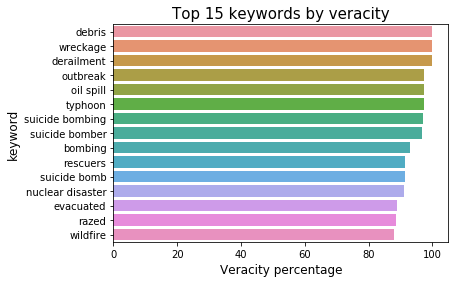

In [184]:
g = sns.barplot(x=ordered_by_target_mean['target_mean']*100, y=ordered_by_target_mean['keyword'], orient='h')
g.set_title("Top 15 keywords by veracity", fontsize=15)
g.set_xlabel("Veracity percentage", fontsize=12)
g.set_ylabel("keyword", fontsize=12)    #agregado de mora

In [185]:
#Ordenado por media de longitud
grouped_by_keyword.sort_values(['length_mean'],ascending=False)

,keyword,target_mean,length_mean,count
166,rescuers,0.914286,129.342857,35
153,outbreak,0.975000,128.925000,40
79,devastation,0.750000,125.722222,36
27,body bag,0.030303,125.393939,33
92,emergency services,0.333333,125.363636,33
...,...,...,...,...
23,blizzard,0.108108,71.891892,37
180,smoke,0.088235,70.882353,34
173,screaming,0.055556,70.472222,36
174,screams,0.142857,70.428571,35


In [186]:
#Ordenado por count
grouped_by_keyword.sort_values(['count'],ascending=False)

,keyword,target_mean,length_mean,count
104,fatalities,0.577778,108.088889,45
63,deluge,0.142857,111.166667,42
8,armageddon,0.119048,102.023810,42
177,sinking,0.195122,103.219512,41
57,damage,0.463415,93.731707,41
...,...,...,...,...
115,forest fire,0.789474,99.947368,19
94,epicentre,0.083333,96.750000,12
194,threat,0.181818,99.818182,11
134,inundation,0.200000,94.300000,10


**Limpieza de texto**

In [187]:
data['clean_text'] = data['text'].str.lower()

In [188]:
#Saco http y me quedo sólo con letras y espacios

In [189]:
def only_letters(tweet):
    tweet = re.sub(r'http\S*', '', tweet)
    tweet = re.sub(r'[^a-z\s]', '', tweet)
    return tweet

In [190]:
data['clean_text'] = data['clean_text'].apply(only_letters)

In [191]:
data.head()

,id,keyword,location,text,target,length,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,just got sent this photo from ruby alaska as s...


In [192]:
#Tokenización
from nltk.tokenize import word_tokenize
data['clean_text'] = data['clean_text'].apply(word_tokenize)

In [193]:
data.head()

,id,keyword,location,text,target,length,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,"[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,"[just, got, sent, this, photo, from, ruby, ala..."


In [194]:
#Elimino stopwords

In [195]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

In [196]:
def filter_stopwords(tokenized_text):
    not_stopwords=[]
    for w in tokenized_text:
        if w not in stop_words:
            not_stopwords.append(w)
    return not_stopwords

In [197]:
data['clean_text'] = data['clean_text'].apply(filter_stopwords)     

In [198]:
data.head()

,id,keyword,location,text,target,length,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,"[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [199]:
#Lemmatization

In [200]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [201]:
def lemmatize_tweet(tweet):
    lemmatized_words = []
    for word in tweet:
        lemmatized_words.append(lemmatizer.lemmatize(word))
    return lemmatized_words

In [202]:
data['clean_text'] = data['clean_text'].apply(lemmatize_tweet)

In [203]:
data.head()

,id,keyword,location,text,target,length,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,"[deed, reason, earthquake, may, allah, forgive..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,"[resident, asked, shelter, place, notified, of..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,"[people, receive, wildfire, evacuation, order,..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [204]:
data['clean_text'] = data['clean_text'].apply(lambda text:' '.join(text))

In [205]:
data.head()

,id,keyword,location,text,target,length,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,got sent photo ruby alaska smoke wildfire pour...


Wordclouds

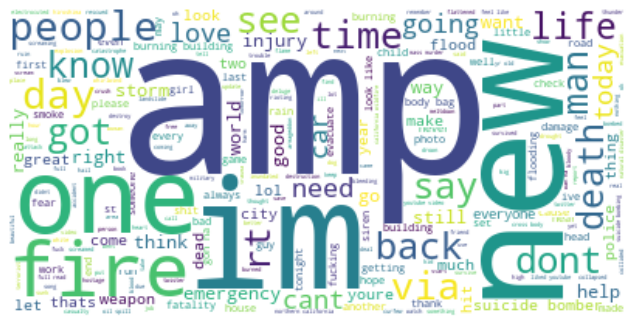

In [206]:
#Reales y falsas
wordcloud = WordCloud(background_color="white",max_words = 400).generate(' '.join(data['clean_text']))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()           

In [207]:
data[data['clean_text'].str.contains('amp')]['clean_text'].tolist()

['haha south tampa getting flooded hah wait second live south tampa gon na gon na fvck flooding',
 'raining flooding florida tampabay tampa day ive lost count',
 'kurd trampling turkmen flag later set ablaze others vandalized office turkmen front diyala',
 'rene ablaze amp jacinta secret k fallen sky edit mar',
 'nowplaying rene ablaze amp ian buff magnitude edm',
 'cant kid cuz got bicycle accident amp split testicle impossible kid michael father',
 'personalinjury accident summer read advice amp see solicitor help otleyhour',
 'mile marker south mooresville iredell vehicle accident ramp closed pm',
 'cessna airplane accident ocampo coahuila mexico july killed four men including state coahuila government official',
 'early wake call sister begging come amp ride wher ambulance hospital rodkiai',
 'volfan tneazzy mizzou annihilated florida past season even ended muschamps career cant compete bama',
 'willienelson need help horse dieplease rt amp sign petitiontake stand amp voice gilbert

In [208]:
data[data['text'].str.contains('amp')]['text'].tolist()

['Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding',
 "#raining #flooding #Florida #TampaBay #Tampa 18 or 19 days. I've lost count ",
 '#Kurds trampling on Turkmen flag later set it ablaze while others vandalized offices of Turkmen Front in #Diyala http://t.co/4IzFdYC3cg',
 'Rene Ablaze &amp; Jacinta - Secret 2k13 (Fallen Skies Edit) - Mar 30 2013  https://t.co/7MLMsUzV1Z',
 '#NowPlaying: Rene Ablaze &amp; Ian Buff - Magnitude http://t.co/Av2JSjfFtc  #EDM',
 "'I can't have kids cuz I got in a bicycle accident &amp; split my testicles. it's impossible for me to have kids' MICHAEL YOU ARE THE FATHER",
 'http://t.co/GKYe6gjTk5 Had a #personalinjury accident this summer? Read our advice &amp; see how a #solicitor can help #OtleyHour',
 'I-77 Mile Marker 31 South Mooresville  Iredell Vehicle Accident Ramp Closed at 8/6 1:18 PM',
 'A Cessna airplane accident in Ocampo Coahuila Mexico on July 29 2015 killed four 

Siempre es &amp, ¿Qué es? https://twitter.com/suzanne_moore/status/234781647936040961
Es algo de HTML, borrar

In [209]:
data['clean_text'] = data['clean_text'].apply(lambda text: re.sub(r'amp | im', '', text))

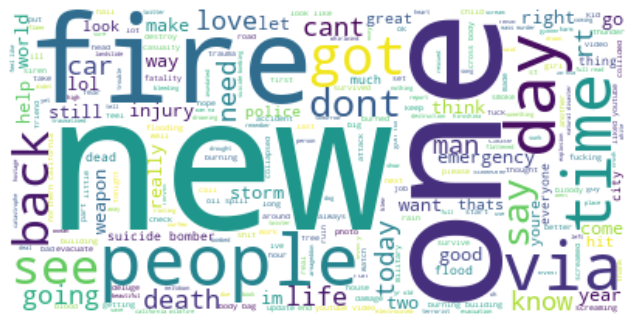

In [210]:
#Wordcloud reales y falsos sin &amp
wordcloud = WordCloud(background_color="white",max_words = 400).generate(' '.join(data['clean_text']))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show() 

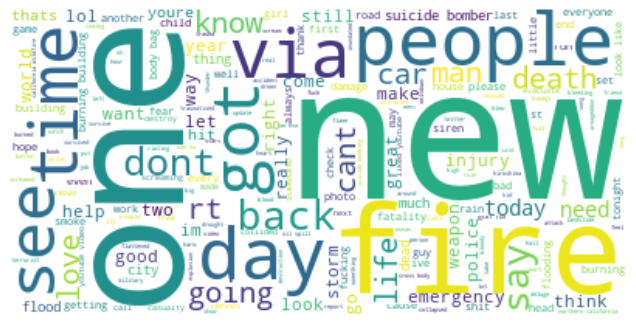

In [211]:
#Reales y falsos
wordcloud = WordCloud(background_color="white",max_words = 400).generate(' '.join(data['clean_text']))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()      

Wordcloud según target

In [212]:
data_grouped = data.groupby('target')
data_fake = data_grouped.get_group(0)
data_real = data_grouped.get_group(1)

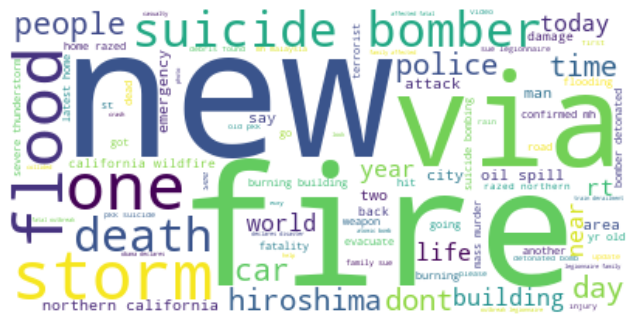

In [213]:
#Reales
wordcloud = WordCloud(background_color="white").generate(' '.join(data_real['clean_text']))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()   

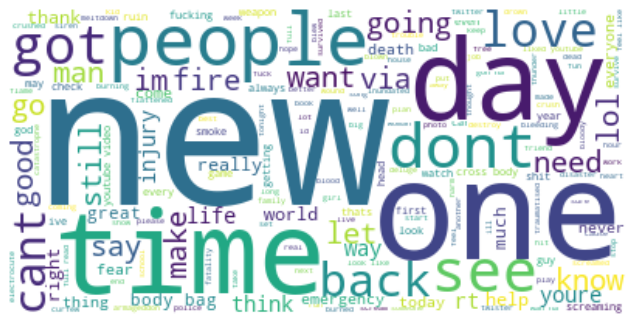

In [214]:
#Falsos
wordcloud = WordCloud(background_color="white").generate(' '.join(data_fake['clean_text']))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()   

In [215]:
data_fake[data_fake['text'].str.contains('http')].head(20)

,id,keyword,location,text,target,length,clean_text
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67,always try bring heavy metal rt
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76,plus side look sky last night ablaze
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,114,check nsfw
44,64,ablaze,NaN,I wanted to set Chicago ablaze with my preachi...,0,92,wanted set chicago ablaze preaching hotel
45,65,ablaze,NaN,I gained 3 followers in the last week. You? Kn...,0,96,gained follower last week know stats grow
48,68,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,114,check nsfw
52,76,ablaze,Barbados,SANTA CRUZ ÛÓ Head of the St Elizabeth Police...,0,134,santa cruz head st elizabeth police superinten...
54,78,ablaze,Abuja,Noches El-Bestia '@Alexis_Sanchez: happy to se...,0,130,noches elbestia alexissanchez happy see teamma...
57,81,ablaze,"Sao Paulo, Brazil",Set our hearts ablaze and every city was a gif...,0,124,set heart ablaze every city gift every skyline...
61,86,ablaze,Inang Pamantasan,Progressive greetings!\n\nIn about a month stu...,0,135,progressive greeting month student would set p...


In [216]:
from collections import Counter
Counter(" ".join(data_real["clean_text"]).split()).most_common()

[('fire', 263),
 ('news', 140),
 ('via', 121),
 ('disaster', 117),
 ('california', 115),
 ('suicide', 110),
 ('u', 107),
 ('police', 107),
 ('people', 106),
 ('family', 105),
 ('home', 100),
 ('train', 100),
 ('building', 94),
 ('killed', 93),
 ('like', 92),
 ('storm', 91),
 ('bomb', 91),
 ('hiroshima', 90),
 ('crash', 89),
 ('pm', 89),
 ('year', 86),
 ('wildfire', 80),
 ('flood', 79),
 ('emergency', 76),
 ('attack', 76),
 ('bombing', 74),
 ('car', 72),
 ('two', 72),
 ('accident', 72),
 ('mh', 72),
 ('nuclear', 71),
 ('video', 71),
 ('get', 70),
 ('time', 70),
 ('one', 69),
 ('death', 66),
 ('say', 66),
 ('northern', 64),
 ('burning', 64),
 ('dead', 63),
 ('legionnaire', 62),
 ('war', 61),
 ('bomber', 61),
 ('life', 59),
 ('still', 57),
 ('new', 56),
 ('atomic', 56),
 ('collapse', 55),
 ('today', 54),
 ('dont', 54),
 ('kill', 54),
 ('obama', 54),
 ('japan', 54),
 ('fatal', 54),
 ('may', 50),
 ('forest', 50),
 ('debris', 50),
 ('warning', 50),
 ('watch', 50),
 ('first', 49),
 ('report',

In [217]:
Counter(" ".join(data_fake["clean_text"]).split()).most_common()

[('like', 255),
 ('get', 185),
 ('new', 169),
 ('dont', 154),
 ('u', 148),
 ('one', 135),
 ('body', 117),
 ('time', 105),
 ('video', 102),
 ('via', 99),
 ('day', 97),
 ('would', 97),
 ('love', 95),
 ('people', 93),
 ('go', 91),
 ('got', 91),
 ('know', 89),
 ('fire', 87),
 ('cant', 86),
 ('let', 86),
 ('back', 85),
 ('see', 84),
 ('bag', 83),
 ('emergency', 82),
 ('want', 81),
 ('make', 76),
 ('full', 76),
 ('youtube', 76),
 ('going', 75),
 ('look', 72),
 ('still', 72),
 ('world', 72),
 ('need', 70),
 ('think', 69),
 ('life', 67),
 ('good', 67),
 ('man', 64),
 ('year', 64),
 ('say', 64),
 ('im', 62),
 ('na', 62),
 ('woman', 62),
 ('lol', 61),
 ('rt', 60),
 ('youre', 60),
 ('first', 58),
 ('way', 58),
 ('take', 58),
 ('news', 58),
 ('work', 57),
 ('last', 56),
 ('burning', 56),
 ('feel', 55),
 ('best', 54),
 ('injury', 54),
 ('really', 54),
 ('thing', 53),
 ('come', 52),
 ('much', 51),
 ('many', 51),
 ('even', 51),
 ('read', 50),
 ('help', 50),
 ('right', 50),
 ('god', 49),
 ('weapon', 4